In [1]:
import pmagpy.ipmag as ipmag
import pmagpy.pmagplotlib as pmagplotlib
import pmagpy.pmag as pmag

from mpl_toolkits.basemap import Basemap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit
%matplotlib inline

/Users/lukefairchild765/anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Dec: 359.6  Inc: 28.4
Number of directions in mean (n): 30
Angular radius of 95% confidence (a_95): 5.9
Precision parameter (k) estimate: 21.1


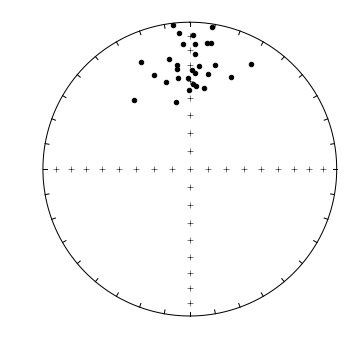

In [2]:
fisher_directions = ipmag.fishrot(k=20, n=30, dec=0, inc=30)
fisher_directions_mean = ipmag.fisher_mean(di_block=fisher_directions)
ipmag.print_direction_mean(fisher_directions_mean)
plt.figure(figsize=(5,5))
ipmag.plot_net(1)
ipmag.plot_di(di_block=fisher_directions)

In [3]:
directions = pd.DataFrame(fisher_directions,columns=['dec','inc','length'])
declinations = directions.dec.tolist()
inclinations = directions.inc.tolist()

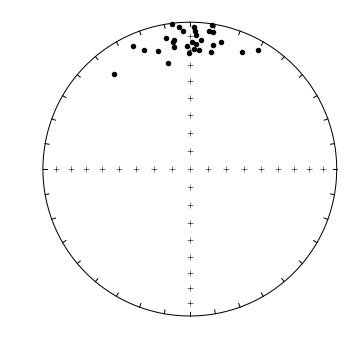

In [4]:
# squish all inclinations
squished_incs = []
for inclination in inclinations:
    squished_incs.append(ipmag.squish(inclination, 0.4))

# plot the squished directional data
plt.figure(num=1,figsize=(5,5))
ipmag.plot_net(1)
ipmag.plot_di(declinations,squished_incs)
squished_DIs = np.array(zip(declinations,squished_incs))

{'Dec': 359.68029848435015,
 'Inc': 28.472636259728237,
 'Me': 0.5450416121995808,
 'Me_critical': 1.094,
 'Mode': 'Mode 1',
 'Mu': 0.86902154932058495,
 'Mu_critical': 1.207,
 'N': 30,
 'Test_result': 'consistent with Fisherian model'}

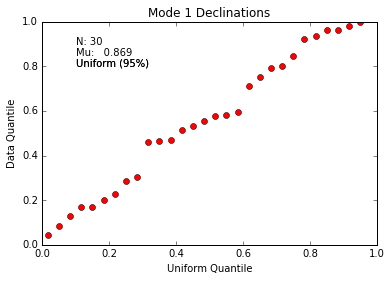

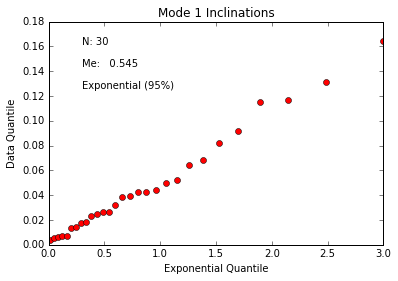

In [5]:
fish_test = ipmag.fishqq(declinations, inclinations)
fish_test

you need N> 10 for at least one mode
you need N> 10 for at least one mode
you need N> 10 for at least one mode
you need N> 10 for at least one mode
you need N> 10 for at least one mode
you need N> 10 for at least one mode
you need N> 10 for at least one mode
you need N> 10 for at least one mode
you need N> 10 for at least one mode
you need N> 10 for at least one mode
you need N> 10 for at least one mode
you need N> 10 for at least one mode
you need N> 10 for at least one mode
you need N> 10 for at least one mode
you need N> 10 for at least one mode
you need N> 10 for at least one mode
you need N> 10 for at least one mode
you need N> 10 for at least one mode
you need N> 10 for at least one mode
you need N> 10 for at least one mode
you need N> 10 for at least one mode
you need N> 10 for at least one mode
you need N> 10 for at least one mode
you need N> 10 for at least one mode
you need N> 10 for at least one mode
you need N> 10 for at least one mode
you need N> 10 for at least one mode
y

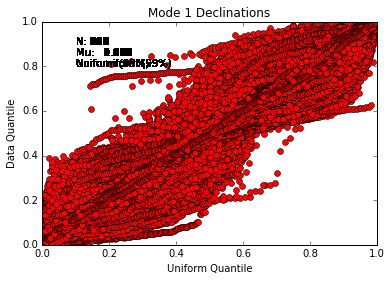

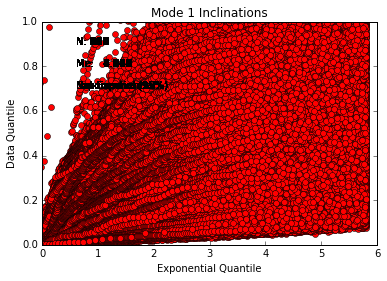

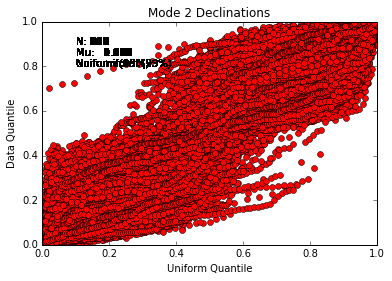

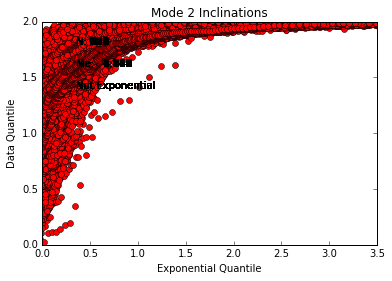

In [6]:
'''%%time

test_table = pd.DataFrame(columns=['N', 'f', 'Fisher', 'kappa'])

# k range = 5-80 ??? maybe should further randomize this based on resultant a95
b = 0
iterator = 0
nb = 3000

while b < nb:
    for flat in np.arange(0.1, 1, 0.05):
        kappa = np.random.choice(np.arange(5,80,5))
#         k=20
        n = np.random.randint(11, 500)
        decs, incs = ipmag.fishrot(k=kappa, n=n, di_block=False)
        squished_incs = ipmag.squish(incs, flat)
        try:
            fisher_test = ipmag.fishqq(decs, squished_incs)
        except:
            decs, squished_incs
        try:
            if fisher_test['Test_result'] == 'Fisherian model rejected':
                passed = False
            elif fisher_test['Test_result'] == 'consistent with Fisherian model':
                passed = True
        except TypeError: # returned two modes (not unimodal Fisher distribution)
            passed = False
        test_table.loc[iterator,['N', 'f', 'Fisher', 'kappa']] = [n, flat, passed, kappa]
        iterator += 1
    b += 1
'''

In [5]:
#test_table.to_csv('./n3000.csv')
test_table = pd.read_csv('./n3000.csv', index_col=0)
test_table

N     f Fisher  kappa
0      122  0.50   True     75
1      209  0.70   True     75
2       82  0.25   True     75
3      339  0.25  False     75
4       17  0.30  False     75
5      294  0.45   True     75
6       90  0.65   True     75
7      395  0.20  False     75
8      188  0.30  False     75
9      476  0.80   True     75
10     428  0.65   True     75
11      13  0.75   True     75
12     494  0.65   True     75
13     102  0.80   True     75
14     382  0.80   True     75
15     166  0.95   True     75
16      26  0.85   True     75
17     321  0.85   True     75
18     321  0.35  False     75
19     321  0.15  False     75
20     165  0.35  False     75
21     287  0.40  False     75
22     278  0.70   True     75
23     356  0.15  False     75
24     136  0.85   True     75
25     236  0.15  False     75
26     176  0.55   True     75
27     407  0.70   True     75
28     100  0.10  False     75
29     369  0.30  False     75
...    ...   ...    ...    ...
53970  181  0.70  False      5
53971  218  0.70  False      5
53972  175  0.30  False      5
53973  391  0.55  False      5
53974  307  0.55  False      5
53975  255  0.80  False      5
53976  430  0.70  False      5
53977  209  0.60  False      5
53978  275  0.95   True      5
53979  104  0.45  False      5
53980  493  0.60  False      5
53981  413  0.40  False      5
53982  309  0.90   True      5
53983  490  0.20  False      5
53984   98  0.30  False      5
53985  305  0.80  False      5
53986  184  0.75   True      5
53987  304  0.35  False      5
53988   40  0.90   True      5
53989   75  0.40  False      5
53990  277  0.70  False      5
53991  294  0.75  False      5
53992  304  0.45  False      5
53993  104  0.40  False      5
53994  377  0.25  False      5
53995  461  0.65  False      5
53996  410  0.55  False      5
53997  193  0.60  False      5
53998   68  0.40  False      5
53999  284  0.40  False      5

[54000 rows x 4 columns]

In [6]:
test_table = test_table.sort_values(by='kappa', ascending=False)
test_table = test_table.reset_index(drop=True)
test_table.head(20)

N     f Fisher  kappa
0   122  0.50   True     75
1   288  0.25  False     75
2   257  0.20  False     75
3   439  0.70   True     75
4   266  0.80   True     75
5   474  0.65   True     75
6   326  0.10  False     75
7   458  0.85  False     75
8   256  0.30  False     75
9   380  0.75   True     75
10  221  0.55   True     75
11   57  0.95  False     75
12  304  0.25  False     75
13  265  0.70  False     75
14   52  0.60   True     75
15  180  0.25  False     75
16   11  0.65   True     75
17  418  0.55  False     75
18  301  0.40  False     75
19   60  0.65  False     75

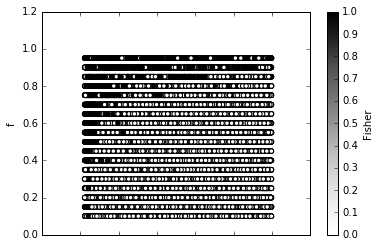

In [7]:
# line separating the True and False datapoints 
# should give the necessary number of samples per site 
# needed for a proper unflattening correction
test_table.plot.scatter('N', 'f', c='Fisher')
plt.show()

In [8]:
test_fail = test_table.loc[test_table['Fisher']==False]
test_pass = test_table.loc[test_table['Fisher']==True]

The primary objective of having a requisite N for a particular site is to make sure we can reliably distinguish between Fisher distributed data that have and have not been squished. 

Below we compare a scatterplot of correctly interpretted distributions of a particular N and flattening factor f (correctly interpretted = not consistent with Fisher distribution, as these are squished directions) with incorrectly interpretted distributions (squished Fisher distributions that were mistaken by ipmag.fishqq for Fisher distributions). The latter group of incorrect interpretations should be the focus for the rest of this model, since a clear pattern emerges -- for any particular combination of flattening factor $f$ and $\kappa$, there appears to be a maximum number of samples $N$ at which an incorrect interpretation is possible (it is clearly an exponential/logarithmic function). 

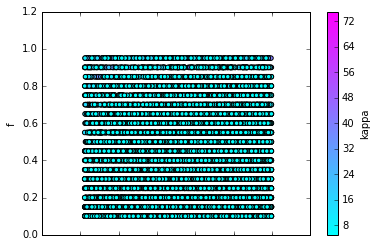

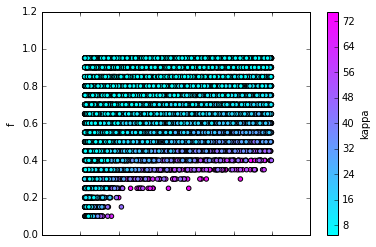

In [40]:
test_fail.plot.scatter('N', 'f', c='kappa', colormap='cool')
test_pass.plot.scatter('N', 'f', c='kappa',colormap='cool')
plt.show()

In [10]:
test_pass['kappa'].unique()

array([75, 70, 65, 60, 55, 50, 45, 40, 35, 30, 25, 20, 15, 10,  5])

So if flattening factor is calculated by find_EI to be approx. 0.2, it looks like about 75 samples would be required for confidence in the correction ($\kappa = 45$). The requisite number of samples apparently increases exponentially with flattening factor (meaning it increases exponentially with the inverse of the degree of flattening). As N goes up, although you can be more confident in your correction, the massive flood of datapoints is more easily mistaken for a Fisher distribution (unless you squish it severely). This all also has dependence on k of course (it is a free variable in reality, although a single value is chosen above).

Interestingly, the lower the concentration parameter k (higher dispersal), the fewer samples are needed to reliably distinguish between an original Fisher distribution and a squished one. 

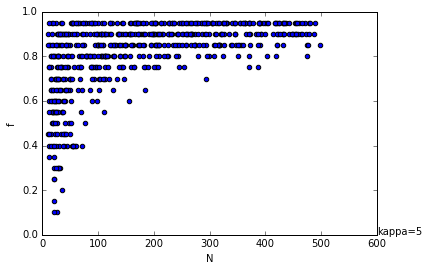

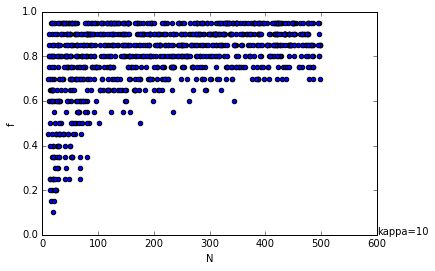

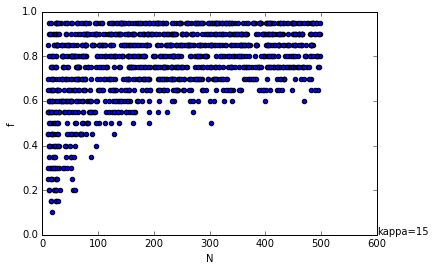

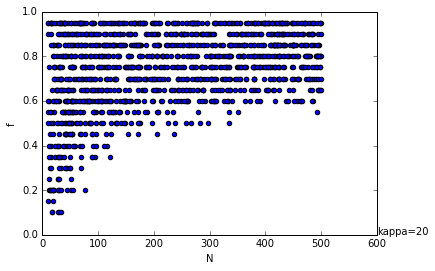

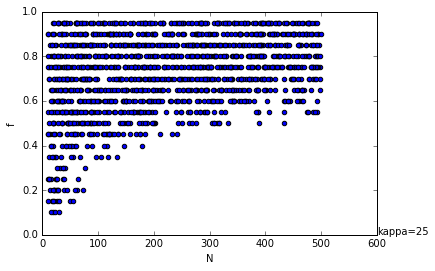

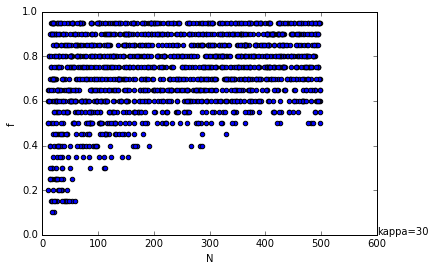

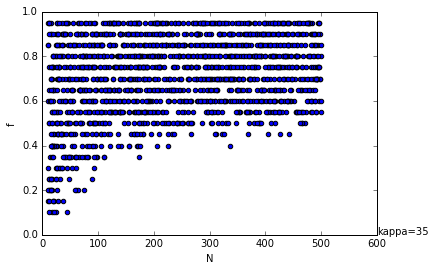

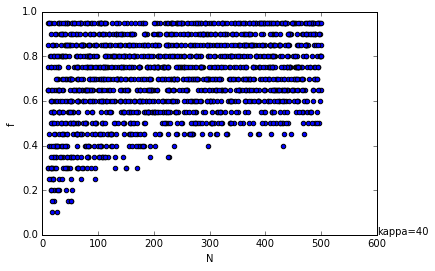

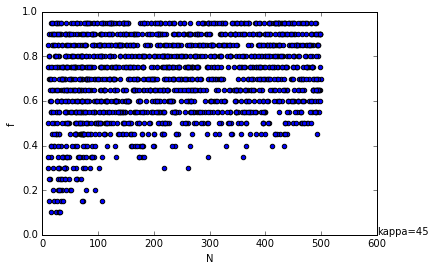

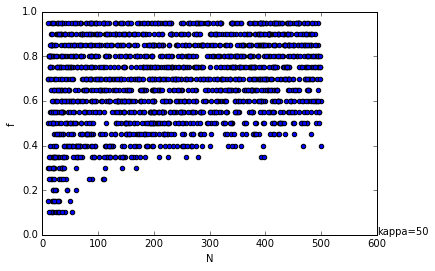

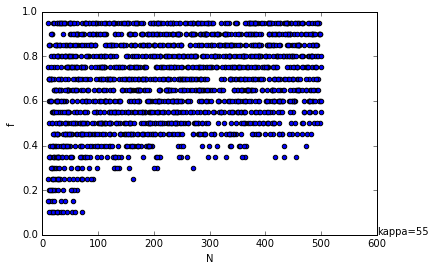

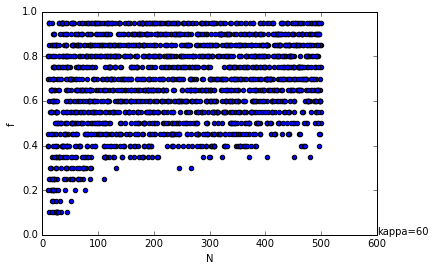

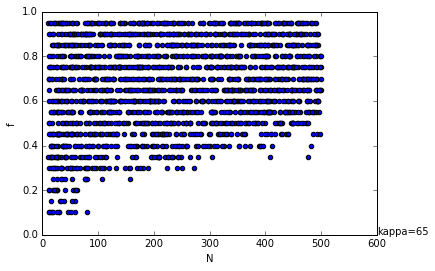

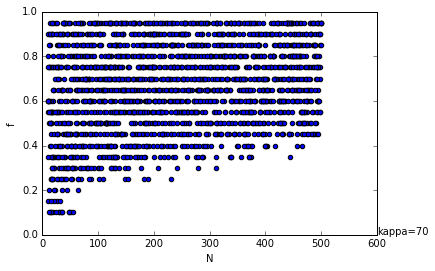

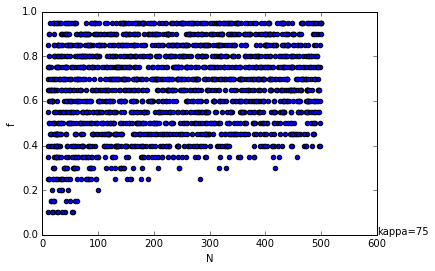

In [11]:
pass_dict = {}

for x in np.arange(5, 80, 5):
    pass_dict['test_pass_k{0}'.format(x)] = test_pass.loc[test_pass['kappa']==x]
    
for x in np.arange(5, 80, 5):
    pass_dict['test_pass_k{0}'.format(x)].plot.scatter('N', 'f', xlim=(0,600), ylim=(0.0,1.0))
    plt.text(1,0,'kappa=' + str(x), transform=plt.gca().transAxes)

In [12]:
combined = pd.DataFrame(columns=test_pass.keys())
combined

Empty DataFrame
Columns: [N, f, Fisher, kappa]
Index: []

In [13]:
for df in pass_dict.values():
    for f in df.f.unique():
        new_df = df.loc[df['f']==f]
        df_maxN = new_df.loc[new_df['N']==new_df.N.max()]
        combined = combined.append(df_maxN, ignore_index=True)

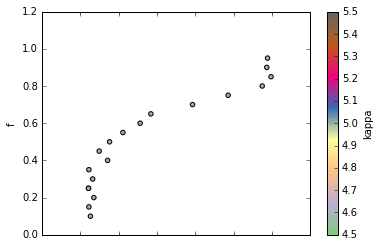

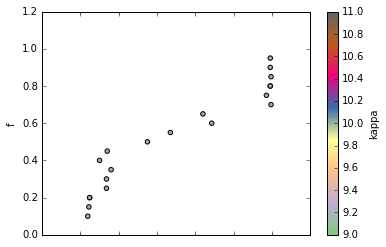

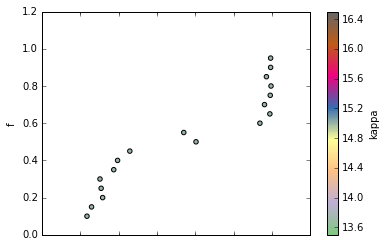

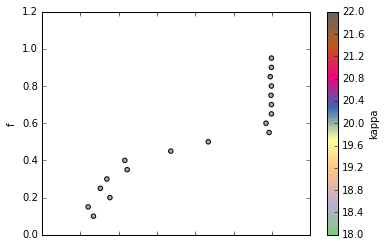

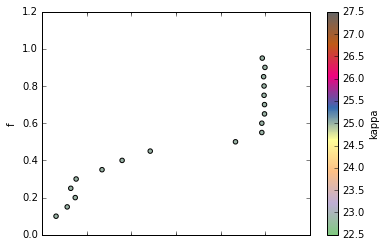

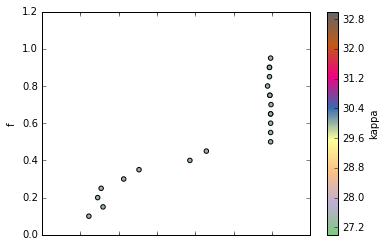

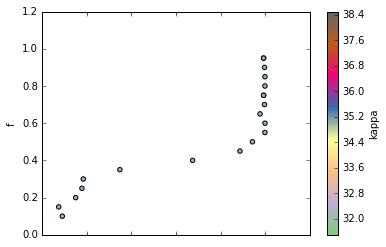

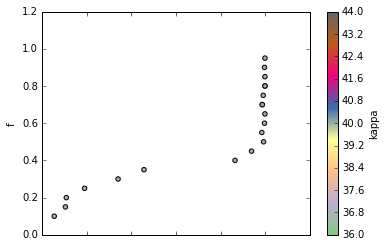

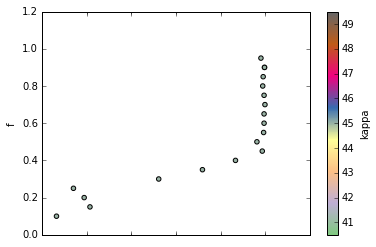

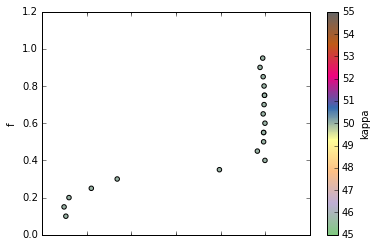

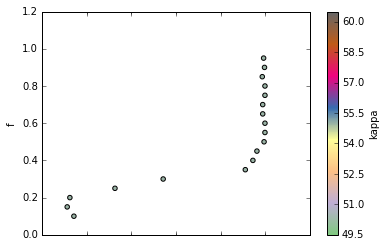

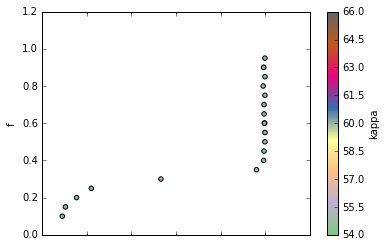

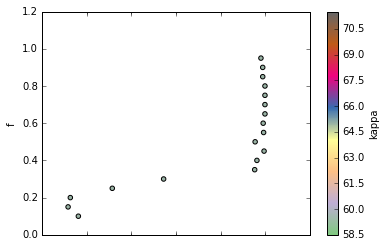

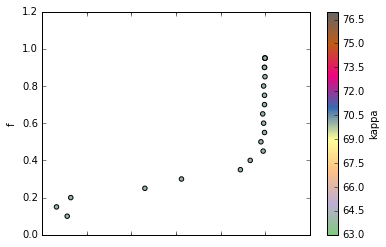

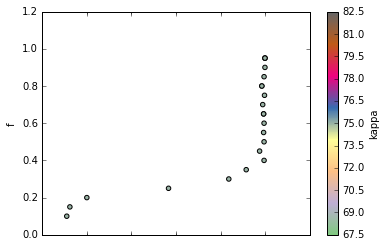

In [14]:
for x in np.arange(5,80,5):
    combined.loc[combined['kappa']==x].plot.scatter('N', 'f', c='kappa',colormap='Accent')

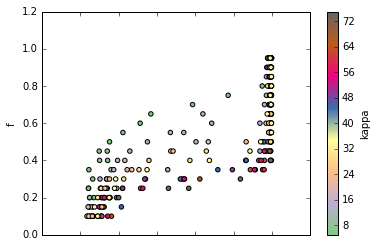

In [22]:
combined.plot.scatter('N', 'f', c='kappa',colormap='Accent')

In [23]:
def ln(x, a, b):
    return a * np.log(x) + b

(0, 1)

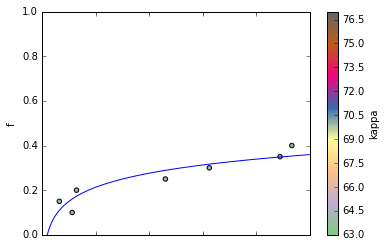

In [32]:
kappa_var = 70
k5 = combined.loc[combined['kappa']==kappa_var].loc[combined['N']<480]
k5.plot.scatter('N', 'f', c='kappa',colormap='Accent')
elements, cov = curve_fit(ln, k5['N'].tolist(), k5['f'].tolist())

xdata = []
ydata = []
for x in np.arange(0,500):
    xdata.append(x)
    ydata.append(ln(x, elements[0], elements[1]))
    
plt.plot(xdata, ydata)
plt.xlim(0,500)
plt.ylim(0,1)

For $\kappa \approx$ {{kappa_var}}, $f(N) =$ {{elements[0]}} $*$ $\ln{N}$ $+ ${{elements[1]}}

In [33]:
from ipywidgets import interact

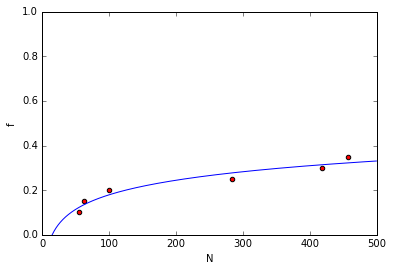

In [39]:
@interact
def find_curve(kappa_var=(5,75,5)):
    k5 = combined.loc[combined['kappa']==kappa_var].loc[combined['N']<480]
    k5.plot.scatter('N', 'f', c='r')
    elements, cov = curve_fit(ln, k5['N'].tolist(), k5['f'].tolist())

    xdata = []
    ydata = []
    for x in np.arange(0,500):
        xdata.append(x)
        ydata.append(ln(x, elements[0], elements[1]))

    plt.plot(xdata, ydata)
    plt.xlim(0,500)
    plt.ylim(0,1)